In [1]:
from glob import glob

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import networkx as nx

In [2]:
romeo_and_juliet_files = glob("../graphdata/romeo-and-juliet**")
sorted(romeo_and_juliet_files)

['../graphdata/romeo-and-juliet_ce-group-mw.edges.csv',
 '../graphdata/romeo-and-juliet_ce-group-w.edges.csv',
 '../graphdata/romeo-and-juliet_ce-scene-mw.edges.csv',
 '../graphdata/romeo-and-juliet_ce-scene-w.edges.csv',
 '../graphdata/romeo-and-juliet_ce.nodes.csv',
 '../graphdata/romeo-and-juliet_hg-group-mw.edges.csv',
 '../graphdata/romeo-and-juliet_hg-group-mw.node-weights.csv',
 '../graphdata/romeo-and-juliet_hg-scene-mw.edges.csv',
 '../graphdata/romeo-and-juliet_hg-scene-mw.node-weights.csv',
 '../graphdata/romeo-and-juliet_hg-speech-mwd.edges.csv',
 '../graphdata/romeo-and-juliet_hg-speech-wd.edges.csv',
 '../graphdata/romeo-and-juliet_hg.nodes.csv',
 '../graphdata/romeo-and-juliet_se-group-w.edges.csv',
 '../graphdata/romeo-and-juliet_se-group.nodes.csv',
 '../graphdata/romeo-and-juliet_se-scene-w.edges.csv',
 '../graphdata/romeo-and-juliet_se-scene.nodes.csv',
 '../graphdata/romeo-and-juliet_se-speech-mwd.edges.csv',
 '../graphdata/romeo-and-juliet_se-speech-wd.edges.csv',


In [3]:
def prettify_identifier(identifier):
    return identifier.replace("#","").split("_")[0]

In [4]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Palatino"
plt.rcParams["text.usetex"] = True
plt.rcParams['pdf.fonttype'] = 42

In [5]:
nodes_ce = pd.read_csv('../graphdata/romeo-and-juliet_ce.nodes.csv')
nodes_ce.node = nodes_ce.node.map(prettify_identifier)
nodes_ce = nodes_ce.query("not node.str.isupper()")

In [6]:
edges_ce_scene_mw = pd.read_csv('../graphdata/romeo-and-juliet_ce-scene-mw.edges.csv')
edges_ce_scene_mw.node1 = edges_ce_scene_mw.node1.map(prettify_identifier)
edges_ce_scene_mw.node2 = edges_ce_scene_mw.node2.map(prettify_identifier)
edges_ce_scene_mw = edges_ce_scene_mw.query("not node1.str.isupper() and not node2.str.isupper()")

In [7]:
height = 6
font_size = 16

In [18]:
def get_graph(nodes_df, edges_df):
    G = nx.Graph()
    G.add_nodes_from(nodes_df.node)
    G.add_edges_from(list(zip(edges_df.node1,edges_df.node2)))
    return G

def get_count_weighted_graph(nodes_df, edges_df):
    G = nx.Graph()
    G.add_nodes_from(nodes_df.node)
    G.add_weighted_edges_from(list(zip(edges_df.node1,edges_df.node2,edges_df["count"])))
    return G

def get_line_weighted_graph(nodes_df, edges_df):
    G = nx.Graph()
    G.add_nodes_from(nodes_df.node)
    G.add_weighted_edges_from(list(zip(edges_df.node1,edges_df.node2, edges_df.n_lines)))
    return G

## All of R & J

### ce-scene-b

In [9]:
G1 = get_graph(nodes_ce, edges_ce_scene_mw)
print(G1)

Graph with 23 nodes and 132 edges


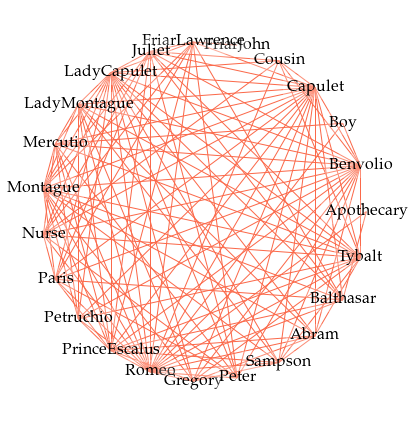

In [11]:
fig, ax = plt.subplots(1,1,figsize=(height,height))
pos = nx.circular_layout(G1)

nx.draw_networkx_edges(G1, pos=pos, ax=ax, edge_cmap=cm.Reds, edge_vmin=0, edge_vmax=1, edge_color=[0.5]*G1.number_of_edges())
nx.draw_networkx_labels(G1, labels={n:n.split(".")[-1] for n in G1.nodes()}, pos=pos, ax=ax,
                        font_family="serif", font_size=font_size, clip_on=False, bbox=dict(fc="white",lw=0, alpha=0.25)
                       )
plt.axis("off")
plt.tight_layout()
plt.savefig("romeo_and_juliet_ce-scene-b.pdf", transparent=True, bbox_inches="tight")

### ce-scene-mb/w

In [12]:
edges_ce_scene_w = pd.read_csv('../graphdata/romeo-and-juliet_ce-scene-w.edges.csv')
edges_ce_scene_w.node1 = edges_ce_scene_w.node1.map(prettify_identifier)
edges_ce_scene_w.node2 = edges_ce_scene_w.node2.map(prettify_identifier)
edges_ce_scene_w = edges_ce_scene_w.query("not node1.str.isupper() and not node2.str.isupper()")

In [13]:
G2 = get_count_weighted_graph(nodes_ce, edges_ce_scene_w)
print(G2)

Graph with 23 nodes and 132 edges


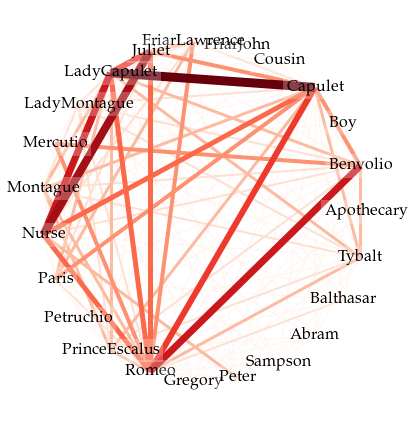

In [14]:
fig, ax = plt.subplots(1,1,figsize=(height,height))
pos = nx.circular_layout(G2)

sorted_edges = [(u,v) for u,v,w in sorted(G2.edges(data="weight"), key=lambda tup:tup[-1])]
sorted_counts = [w for u,v,w in sorted(G2.edges(data="weight"), key=lambda tup:tup[-1])]

nx.draw_networkx_edges(G2, pos=pos, ax=ax, edge_cmap=cm.Reds, 
                       edgelist=sorted_edges,
                       edge_vmin=edges_ce_scene_w["count"].min(), edge_vmax=edges_ce_scene_w["count"].max(), 
                       edge_color=sorted_counts,
                       width=sorted_counts
                      )
nx.draw_networkx_labels(G2, labels={n:n.split(".")[-1] for n in G2.nodes()}, pos=pos, ax=ax,
                        font_family="serif", font_size=font_size, clip_on=False, bbox=dict(fc="white",lw=0, alpha=0.25)
                       )
plt.axis("off")
plt.tight_layout()
plt.savefig("romeo_and_juliet_ce-scene-mb.pdf", transparent=True, bbox_inches="tight")

### ce-scene-mw

In [19]:
edges_ce_scene_mw_agg = edges_ce_scene_mw.groupby(["node1","node2"]).agg(dict(n_lines=sum)).reset_index()

In [20]:
G3 = get_line_weighted_graph(nodes_ce, edges_ce_scene_mw_agg)
print(G3)

Graph with 23 nodes and 132 edges


In [21]:
sorted_edges = [(u,v) for u,v,w in sorted(G3.edges(data="weight"), key=lambda tup:tup[-1])]
sorted_weights = [w for u,v,w in sorted(G3.edges(data="weight"), key=lambda tup:tup[-1])]
edge_widths_scene = [w/150 for w in sorted_weights]
vmin = min(edge_widths_scene)
vmax = max(edge_widths_scene)

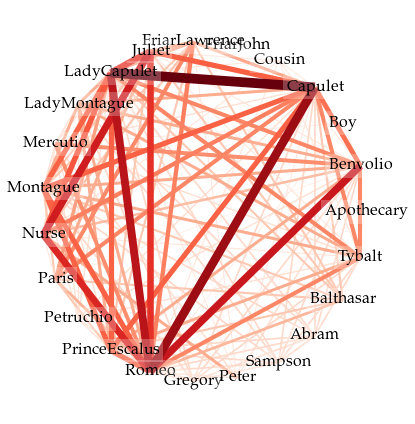

In [22]:
fig, ax = plt.subplots(1,1,figsize=(height,height))
pos = nx.circular_layout(G3)

nx.draw_networkx_edges(G3, pos=pos, ax=ax, 
                       edgelist=sorted_edges,
                       width=edge_widths_scene, 
                       edge_cmap=cm.Reds, edge_vmin=vmin, edge_vmax=vmax, edge_color=edge_widths_scene,
                      )
nx.draw_networkx_labels(G3, labels={n:n.split(".")[-1] for n in G3.nodes()}, pos=pos, ax=ax,
                        font_family="serif", font_size=font_size, clip_on=False, bbox=dict(fc="white",lw=0, alpha=0.25)
                       )
plt.axis("off")
plt.tight_layout()
plt.savefig("romeo_and_juliet_ce-scene-mw.pdf", transparent=True, bbox_inches="tight")

## Only Act III

### ce-scene-mw

In [46]:
edges_ce_scene_mw_agg3 = edges_ce_scene_mw.query("act == 3").groupby(["node1","node2"]).agg(dict(n_lines="sum")).reset_index()

In [50]:
G1 = nx.Graph()
G1.add_nodes_from([n for n in nodes_ce.node if n in edges_ce_scene_mw_agg3.node1 or n in edges_ce_scene_mw_agg3.node2])
G1.add_weighted_edges_from(list(zip(edges_ce_scene_mw_agg3.node1,edges_ce_scene_mw_agg3.node2, edges_ce_scene_mw_agg3.n_lines)))
print(G1)

Graph with 14 nodes and 56 edges


In [51]:
sorted_edges1 = [(u,v) for u,v,w in sorted(G1.edges(data="weight"), key=lambda tup:tup[-1])]
sorted_weights1 = [w for u,v,w in sorted(G1.edges(data="weight"), key=lambda tup:tup[-1])]
edge_widths_scene1 = [w/50 for w in sorted_weights1]

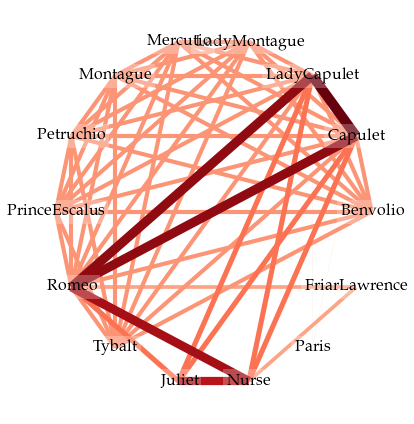

In [52]:
fig, ax = plt.subplots(1,1,figsize=(height,height))
pos = nx.circular_layout(G1)

nx.draw_networkx_edges(G1, pos=pos, ax=ax, 
                       edgelist=sorted_edges1,
                       width=edge_widths_scene1, 
                       edge_cmap=cm.Reds, edge_vmin=min(edge_widths_scene1), edge_vmax=max(edge_widths_scene1), edge_color=edge_widths_scene1,
                      )
nx.draw_networkx_labels(G1, labels={n:n.split(".")[-1] for n in G1.nodes()}, pos=pos, ax=ax,
                        font_family="serif", font_size=font_size, clip_on=False, bbox=dict(fc="white",lw=0, alpha=0.25)
                       )
plt.axis("off")
plt.tight_layout()
plt.savefig("romeo_and_juliet_ce-scene-mw-3.pdf", transparent=True, bbox_inches="tight")

### ce-group-mw

In [29]:
edges_ce_group_mw = pd.read_csv('../graphdata/romeo-and-juliet_ce-group-mw.edges.csv')
edges_ce_group_mw.node1 = edges_ce_group_mw.node1.map(prettify_identifier)
edges_ce_group_mw.node2 = edges_ce_group_mw.node2.map(prettify_identifier)
edges_ce_group_mw = edges_ce_group_mw.query("not node1.str.isupper() and not node2.str.isupper()")

In [30]:
edges_ce_group_mw_agg3 = edges_ce_group_mw.query("act == 3").groupby(["node1","node2"]).agg(dict(n_lines=sum)).reset_index()

In [31]:
G2 = nx.Graph()
G2.add_nodes_from([n for n in nodes_ce.node if n in edges_ce_group_mw_agg3.node1 or n in edges_ce_group_mw_agg3.node2])
G2.add_weighted_edges_from(list(zip(edges_ce_group_mw_agg3.node1,edges_ce_group_mw_agg3.node2, edges_ce_group_mw_agg3.n_lines)))
print(G2)

Graph with 14 nodes and 41 edges


In [32]:
sorted_edges2 = [(u,v) for u,v,w in sorted(G2.edges(data="weight"), key=lambda tup:tup[-1])]
sorted_weights2 = [w for u,v,w in sorted(G2.edges(data="weight"), key=lambda tup:tup[-1])]
edge_widths_group2 = [w/50 for w in sorted_weights2]

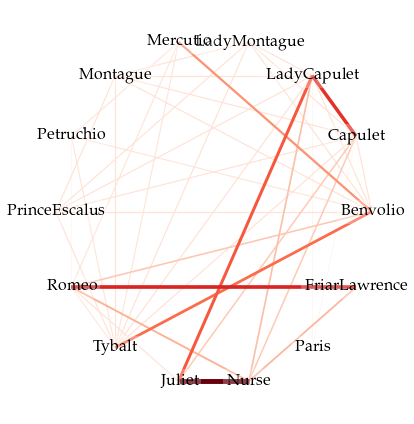

In [42]:
fig, ax = plt.subplots(1,1,figsize=(height,height))
pos = nx.circular_layout(G2)



nx.draw_networkx_edges(G2, pos=pos, ax=ax, 
                       edgelist=sorted_edges2,
                       width=edge_widths_group2, 
                       edge_cmap=cm.Reds, edge_vmin=min(edge_widths_group2), edge_vmax=max(edge_widths_group2), edge_color=edge_widths_group2,
                      )
nx.draw_networkx_labels(G2, labels={n:n.split(".")[-1] for n in G2.nodes()}, pos=pos, ax=ax,
                        font_family="serif", font_size=font_size, clip_on=False, bbox=dict(fc="white",lw=0, alpha=0.25)
                       )
plt.axis("off")
plt.tight_layout()
plt.savefig("romeo_and_juliet_ce-group-mw-3.pdf", transparent=True, bbox_inches="tight")

### Differences

In [43]:
df_diff = pd.DataFrame(sorted(G1.edges(data="weight")), columns=["node1","node2","n_lines_scene"]).set_index(["node1","node2"])
df_diff["n_lines_group"] = 0
for n1,n2,w in G2.edges(data="weight"):
    df_diff.at[(n1,n2),"n_lines_group"] = w
df_diff["n_lines_difference"] = df_diff.n_lines_scene - df_diff.n_lines_group
df_diff = df_diff.query("n_lines_difference != 0")

In [44]:
edge_widths_difference = [df_diff.at[(u,v),"n_lines_difference"]/50 for u,v in G1.edges() if (u,v) in df_diff.index]

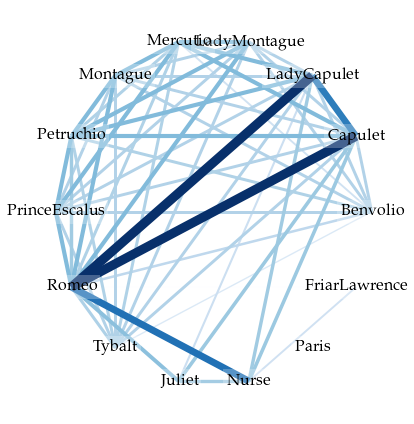

In [45]:
fig, ax = plt.subplots(1,1,figsize=(height,height))
nx.draw_networkx_edges(G1, pos=pos, ax=ax, 
                       edgelist=df_diff.sort_values("n_lines_difference", ascending=True).index,
                       width=sorted(edge_widths_difference),
                       edge_cmap=cm.Blues, edge_vmin=min(edge_widths_difference), edge_vmax=max(edge_widths_difference), 
                       edge_color=sorted(edge_widths_difference),
                      )
nx.draw_networkx_labels(G1, labels={n:n.split(".")[-1] for n in G1.nodes()}, pos=pos, ax=ax,
                        font_family="serif", font_size=font_size, clip_on=False, bbox=dict(fc="white",lw=0, alpha=0.25)
                       )
plt.axis("off")
plt.tight_layout()
plt.savefig("romeo_and_juliet_ce-3-differences.pdf", transparent=True, bbox_inches="tight")

In [ ]:
height = 6
font_size = 16
fig, ax = plt.subplots(1,3,figsize=(height*3+1,height))
pos = nx.circular_layout(G_ce_group_mw)

#nx.draw_networkx_nodes(G_ce_scene_mw, pos=pos, ax=ax[0], node_color="silver")
nx.draw_networkx_edges(G_ce_scene_mw, pos=pos, ax=ax[0], 
                       edgelist=[(u,v) for u,v,w in sorted(G_ce_scene_mw.edges(data="weight"),key=lambda tup:tup[-1])],
                       width=sorted(edge_widths_scene), 
                       edge_cmap=cm.Reds, edge_vmin=vmin, edge_vmax=vmax, edge_color=sorted(edge_widths_scene),
                      )
nx.draw_networkx_labels(G_ce_scene_mw, labels={n:n.split(".")[-1] for n in G_ce_group_mw.nodes()}, pos=pos, ax=ax[0],
                        font_family="serif", font_size=font_size, clip_on=False, bbox=dict(fc="white",lw=0, alpha=0.25)
                       )

#nx.draw_networkx_nodes(G_ce_scene_mw, pos=pos, ax=ax[1], node_color="silver")
nx.draw_networkx_edges(G_ce_group_mw, pos=pos, ax=ax[1], width=sorted(edge_widths_group), 
                       edgelist=[(u,v) for u,v,w in sorted(G_ce_group_mw.edges(data="weight"),key=lambda tup:tup[-1])],
                       edge_cmap=cm.Reds, edge_vmin=vmin, edge_vmax=vmax, edge_color=sorted(edge_widths_group),
                      )
nx.draw_networkx_labels(G_ce_group_mw, labels={n:n.split(".")[-1] for n in G_ce_group_mw.nodes()}, pos=pos, ax=ax[1],
                        font_family="serif", font_size=font_size, clip_on=False, bbox=dict(fc="white",lw=0, alpha=0.25)
                       )


#nx.draw_networkx_nodes(G_ce_scene_mw, pos=pos, ax=ax[2], node_color="silver")
nx.draw_networkx_edges(G_ce_scene_mw, pos=pos, ax=ax[2], 
                       edgelist=df_diff.sort_values("n_lines_difference", ascending=True).index,
                       width=sorted(edge_widths_difference),
                       edge_cmap=cm.Blues, edge_vmin=vmin, edge_vmax=vmax, edge_color=sorted(edge_widths_difference),
                      )
nx.draw_networkx_labels(G_ce_scene_mw, labels={n:n.split(".")[-1] for n in G_ce_scene_mw.nodes()}, pos=pos, ax=ax[2],
                        font_family="serif", font_size=font_size, clip_on=False, bbox=dict(fc="white",lw=0, alpha=0.25)
                       )

for idx in range(3):
    ax[idx].axis("off")
plt.tight_layout()
plt.savefig("romeo_and_juliet_ce-differences.pdf", transparent=True, bbox_inches="tight")

In [ ]:
act_3_scene_5_ce = edges_ce_group_mw.query("act == 3 and scene == 5").groupby(["node1","node2"]).agg(dict(n_lines=sum))

In [ ]:
act_3_scene_5_ce_edges = list((*idx,row["n_lines"]) for idx, row in act_3_scene_5_ce.iterrows())

In [ ]:
G_3_5 = nx.Graph()
G_3_5.add_weighted_edges_from(act_3_scene_5_ce_edges)

In [ ]:
edge_widths_3_5 = [w/25 for u,v,w in sorted(G_3_5.edges(data="weight"),key=lambda tup:tup[-1])]
min35 = min(edge_widths_3_5)
max35 = max(edge_widths_3_5)
height = 6
font_size = 16
fig, ax = plt.subplots(1,1,figsize=(height,height))
pos = nx.circular_layout(G_3_5)
#nx.draw_networkx_nodes(G_3_5, pos=pos 
                       #nodelist=["Capulet","Juliet","LadyCapulet","Nurse","Romeo"], 
                       #node_color=["#984ea3","#e41a1c","#984ea3","silver","#e41a1c"])
nx.draw_networkx_labels(G_3_5, pos=pos, clip_on=False, font_size=font_size,bbox=dict(fc="white",lw=0, alpha=0.25))
nx.draw_networkx_edges(G_3_5, pos=pos, width=edge_widths_3_5,
                       edgelist=[(u,v) for u,v,w in sorted(G_3_5.edges(data="weight"),key=lambda tup:tup[-1])],
                       edge_cmap=cm.Reds, edge_vmin=min35-5, edge_vmax=max35, edge_color=edge_widths_3_5
                      )
plt.axis("off")
plt.tight_layout()
plt.savefig("romeo_and_juliet_ce-3_5.pdf", transparent=True, bbox_inches="tight")

### Star expansions

In [53]:
se_scene_nodes = pd.read_csv('../graphdata/romeo-and-juliet_se-scene.nodes.csv')
se_scene_nodes.node = se_scene_nodes.node.map(prettify_identifier)
se_scene_edges = pd.read_csv('../graphdata/romeo-and-juliet_se-scene-w.edges.csv')
se_scene_edges.node1 = se_scene_edges.node1.map(prettify_identifier)
se_scene_edges.node2 = se_scene_edges.node2.astype(str)
se_scene_edges = se_scene_edges.query("not node1.str.isupper()")

se_group_nodes = pd.read_csv('../graphdata/romeo-and-juliet_se-group.nodes.csv')
se_group_nodes.node = se_group_nodes.node.map(prettify_identifier)
se_group_edges = pd.read_csv('../graphdata/romeo-and-juliet_se-group-w.edges.csv')
se_group_edges.node1 = se_group_edges.node1.map(prettify_identifier)
se_group_edges.node2 = se_group_edges.node2.astype(str)
se_group_edges = se_group_edges.query("not node1.str.isupper()")

In [54]:
se_scene_act3_edges = se_scene_edges.query("node2.str.startswith('3')")
se_group_act3_edges = se_group_edges.query("node2.str.startswith('3')")

In [55]:
G_act3 = nx.Graph()
G_act3.add_nodes_from(se_scene_act3_edges.node1, node_type="character")
G_act3.add_nodes_from(se_scene_act3_edges.node2, node_type="text_unit")
G_act3.add_weighted_edges_from(list(zip(se_scene_act3_edges.node1, se_scene_act3_edges.node2, se_scene_act3_edges.n_lines)))

In [56]:
characters_act3 = sorted(se_scene_act3_edges.node1.unique())
scene_play_parts_act3 = sorted(se_scene_act3_edges.node2.unique())

In [104]:
selected_labels = ["Romeo", "Juliet", "Nurse", "Capulet", "LadyCapulet"]

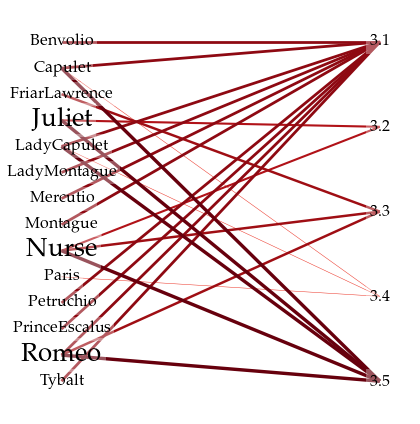

In [132]:
pos = {**{k:(0,1-idx/(len(characters_act3)-1)) for idx,k in enumerate(characters_act3)}, 
       **{k:(1,1-idx/(len(scene_play_parts_act3)-1)) for idx,k in enumerate(scene_play_parts_act3)}}
font_size = 16
fig, ax = plt.subplots(1,1,figsize=(6,6))

act3_edgewidths = [w/75 for u,v,w in sorted(G_act3.edges(data="weight"),key=lambda tup:tup[-1])]
min3 = min(act3_edgewidths)
max3 = max(act3_edgewidths)
nx.draw_networkx_edges(G_act3, pos=pos, width=act3_edgewidths, 
                       edgelist=[(u,v) for u,v,w in sorted(G_act3.edges(data="weight"),key=lambda tup:tup[-1])],
                       edge_cmap=cm.Reds, edge_vmin=min3-5, edge_vmax=max3, edge_color=act3_edgewidths)
nx.draw_networkx_labels(G_act3, pos=pos, clip_on=False, font_size=font_size, bbox=dict(fc="white",lw=0, alpha=0.33),
                       labels={k:k.replace("3.0","3.") for k in G_act3.nodes() if k not in selected_labels}
                       )
nx.draw_networkx_labels(G_act3, labels={k:k for k in selected_labels}, 
                        pos=pos, clip_on=False, font_size=font_size+10, 
                        bbox=dict(fc="white",lw=0, alpha=0.33),
                       )
plt.axis("off")
plt.tight_layout()
plt.savefig("romeo_and_juliet_se-scene_act-3.pdf", transparent=True, bbox_inches="tight")

In [58]:
G_act3_group = nx.Graph()
G_act3_group.add_nodes_from(se_group_act3_edges.node1, node_type="character")
G_act3_group.add_nodes_from(se_group_act3_edges.node2, node_type="text_unit")
G_act3_group.add_weighted_edges_from(list(zip(se_group_act3_edges.node1, se_group_act3_edges.node2, se_group_act3_edges.n_lines)))

In [59]:
characters_act3_group = sorted(se_group_act3_edges.node1.unique())
group_play_parts_act3 = sorted(se_group_act3_edges.node2.unique())

In [71]:
def make_label(label):
    components = [int(x) for x in label.split(".")]
    return components

In [82]:
bipartite_labels = {k:k if k.isalpha() else make_label(k) for k in G_act3_group.nodes}
min_label = min([n[-1] for n in bipartite_labels.values() if type(n) == list])
for k,v in bipartite_labels.items():
    if type(v) == list:
        bipartite_labels[k][-1] -= min_label -1
        bipartite_labels[k] = f"{bipartite_labels[k][0]}.{bipartite_labels[k][1]}.{bipartite_labels[k][-1]:02}"

In [119]:
selected_labels = ["Romeo", "Juliet", "Nurse"]

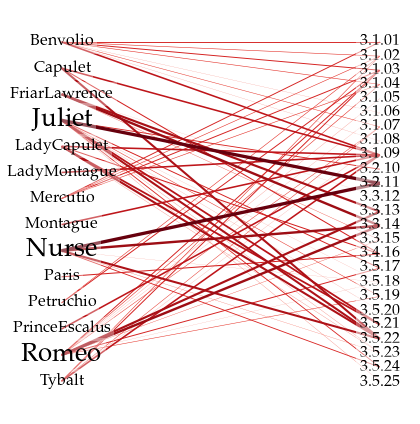

In [120]:
pos = {**{k:(0,1-idx/(len(characters_act3_group)-1)) for idx,k in enumerate(characters_act3_group)}, 
       **{k:(1,1-idx/(len(group_play_parts_act3)-1)) for idx,k in enumerate(group_play_parts_act3)}}
font_size = 16
fig, ax = plt.subplots(1,1,figsize=(6,6))
act3_group_edgewidths = [w/(75/2) for u,v,w in sorted(G_act3_group.edges(data="weight"),key=lambda tup:tup[-1])]
min3 = min(act3_group_edgewidths)
max3 = max(act3_group_edgewidths)
nx.draw_networkx_edges(G_act3_group, pos=pos, width=act3_group_edgewidths, 
                       edgelist=[(u,v) for u,v,w in sorted(G_act3_group.edges(data="weight"),key=lambda tup:tup[-1])],
                       edge_cmap=cm.Reds, edge_vmin=min3-5, edge_vmax=max3, edge_color=act3_group_edgewidths)
nx.draw_networkx_labels(G_act3_group, labels={k:v for k,v in bipartite_labels.items() if k not in selected_labels}, 
                        pos=pos, clip_on=False, font_size=font_size, 
                        bbox=dict(fc="white",lw=0, alpha=0.33),
                       )
nx.draw_networkx_labels(G_act3_group, labels={k:k for k in selected_labels}, 
                        pos=pos, clip_on=False, font_size=font_size+10, 
                        bbox=dict(fc="white",lw=0, alpha=0.33),
                       )
plt.axis("off")
plt.tight_layout()
plt.savefig("romeo_and_juliet_se-group_act-3.pdf", transparent=True, bbox_inches="tight")

In [121]:
se_group_3_5_edges = se_group_act3_edges.query("node2.str.startswith('3.05')")
se_group_3_5_edges.tail()

,node1,node2,n_lines,n_tokens
314,LadyCapulet,3.05.0078,8,68
315,Nurse,3.05.0078,8,68
316,Juliet,3.05.0079,32,241
317,Nurse,3.05.0079,32,241
318,Juliet,3.05.0080,8,63


In [122]:
characters_3_5_group = sorted(se_group_3_5_edges.node1.unique())
group_play_parts_3_5 = sorted(se_group_3_5_edges.node2.unique())

In [123]:
G_3_5_se = nx.Graph()
G_3_5_se.add_weighted_edges_from(list(zip(se_group_3_5_edges.node1, se_group_3_5_edges.node2, se_group_3_5_edges.n_lines)))

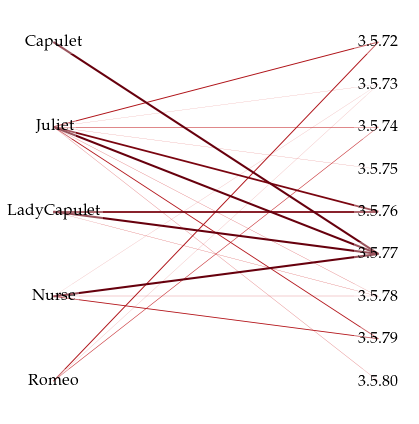

In [124]:
pos = {**{k:(0,1-idx/(len(characters_3_5_group)-1)) for idx,k in enumerate(characters_3_5_group)}, 
       **{k:(1,1-idx/(len(group_play_parts_3_5)-1)) for idx,k in enumerate(group_play_parts_3_5)}}
font_size = 16
fig, ax = plt.subplots(1,1,figsize=(6,6))
act3_5_group_edgewidths = [w/(75/2) for u,v,w in sorted(G_3_5_se.edges(data="weight"),key=lambda tup:tup[-1])]
min3 = min(act3_5_group_edgewidths)
max3 = max(act3_5_group_edgewidths)
nx.draw_networkx_edges(G_3_5_se, pos=pos, width=act3_5_group_edgewidths, 
                       edgelist=[(u,v) for u,v,w in sorted(G_3_5_se.edges(data="weight"),key=lambda tup:tup[-1])],
                       edge_cmap=cm.Reds, edge_vmin=min3-5, edge_vmax=max3, edge_color=act3_5_group_edgewidths)
nx.draw_networkx_labels(G_3_5_se, labels={k:k.replace("00","").replace("3.0","3.") for k in G_3_5_se.nodes()}, 
                        pos=pos, clip_on=False, font_size=font_size, 
                        bbox=dict(fc="white",lw=0, alpha=0.33)
                       )
plt.axis("off")
plt.tight_layout()
plt.savefig("romeo_and_juliet_se-group_3-5.pdf", transparent=True, bbox_inches="tight")

## Crap Code Alarm!

### Star expansion, speech level, Act III

In [125]:
speech_nodes = pd.read_csv('../graphdata/romeo-and-juliet_se-speech.nodes.csv')
speech_nodes.node = speech_nodes.node.map(prettify_identifier)

In [126]:
speech_edges_wd = pd.read_csv('../graphdata/romeo-and-juliet_se-speech-wd.edges.csv')
speech_edges_wd.source = speech_edges_wd.source.map(prettify_identifier)
speech_edges_wd.target = speech_edges_wd.target.map(prettify_identifier)

In [127]:
speech_edges_wd_3_5 = speech_edges_wd.query("source.str.startswith('3.') or target.str.startswith('3.')").copy()
speech_edges_wd_3_5 = speech_edges_wd_3_5.query("not source.str.isupper() and not target.str.isupper()").copy()
speech_edges_wd_3_5.source = speech_edges_wd_3_5.source.map(lambda x: x if x.startswith("3") else f"{x}-O")
speech_edges_wd_3_5.target = speech_edges_wd_3_5.target.map(lambda x: x if x.startswith("3") else f"{x}-I")

In [128]:
speech_G = nx.DiGraph()
speech_G.add_nodes_from({n for n in list(speech_edges_wd_3_5.source) + list(speech_edges_wd_3_5.target)})
speech_G.add_weighted_edges_from(list(zip(speech_edges_wd_3_5.source,speech_edges_wd_3_5.target, speech_edges_wd_3_5.n_lines)))
print(speech_G)

DiGraph with 52 nodes and 113 edges


In [129]:
in_characters = sorted([n for n in speech_G.nodes if n.endswith("I")])
out_characters = sorted([n for n in speech_G.nodes if n.endswith("O")])
text_units = sorted([n for n in speech_G.nodes if n.startswith("3")])

In [130]:
pos = {**{k:(0,1-idx/(len(out_characters)-1)) for idx,k in enumerate(out_characters)}, 
       **{k:(1,1-idx/(len(text_units)-1)) for idx,k in enumerate(text_units)},
       **{k:(2,1-idx/(len(in_characters)-1)) for idx,k in enumerate(in_characters)}
      }

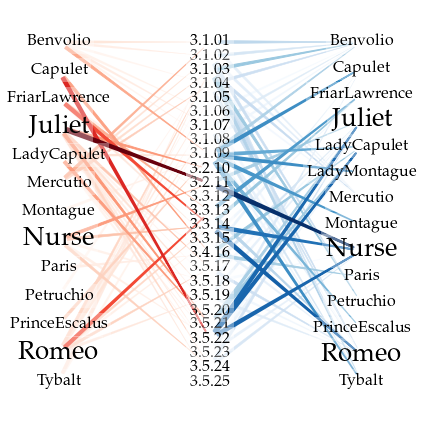

In [131]:
font_size = 16
fig, ax = plt.subplots(1,1,figsize=(6,6))
speech_edgewidths = [w/(75/2) for u,v,w in sorted(speech_G.edges(data="weight"),key=lambda tup:tup[-1])]
speech_edgewidths_out = [w/(75/2) for u,v,w in sorted(speech_G.edges(data="weight"),key=lambda tup:tup[-1]) if u.endswith("O")]
speech_edgewidths_in = [w/(75/2) for u,v,w in sorted(speech_G.edges(data="weight"),key=lambda tup:tup[-1]) if v.endswith("I")]
min3 = min(speech_edgewidths)
max3 = max(speech_edgewidths)
nx.draw_networkx_edges(speech_G, pos=pos, width=speech_edgewidths_out, 
                       edgelist=[(u,v) for u,v,w in sorted(speech_G.edges(data="weight"),key=lambda tup:tup[-1]) if u.endswith("O")],
                       edge_cmap=cm.Reds, edge_vmin=min3, edge_vmax=max3, edge_color=speech_edgewidths_out,
                       arrows=True, arrowstyle="wedge"
                      )
nx.draw_networkx_edges(speech_G, pos=pos, width=speech_edgewidths_in, 
                       edgelist=[(u,v) for u,v,w in sorted(speech_G.edges(data="weight"),key=lambda tup:tup[-1]) if v.endswith("I")],
                       edge_cmap=cm.Blues, edge_vmin=min3, edge_vmax=max3, edge_color=speech_edgewidths_in,
                       arrows=True, arrowstyle="wedge"
                      )
nx.draw_networkx_labels(speech_G, labels={k:bipartite_labels.get(k,k.split("-")[0]) for k in speech_G.nodes() if k.split("-")[0] not in selected_labels}, 
                        pos=pos, clip_on=False, font_size=font_size, 
                        bbox=dict(fc="white",lw=0, alpha=0.33)
                       )
nx.draw_networkx_labels(speech_G, labels={k:bipartite_labels.get(k,k.split("-")[0]) for k in speech_G.nodes() if k.split("-")[0] in selected_labels}, 
                        pos=pos, clip_on=False, 
                        bbox=dict(fc="white",lw=0, alpha=0.33),
                        font_size=font_size+10
                       )
plt.axis("off")
plt.tight_layout()
plt.savefig("romeo_and_juliet_se-speech_3.pdf", transparent=True, bbox_inches="tight")

### Star expansion, speech level, Act III, Scene V

In [ ]:
speech_edges_wd_3_5 = speech_edges_wd.query("source.str.startswith('3.05') or target.str.startswith('3.05')").copy()
speech_edges_wd_3_5 = speech_edges_wd_3_5.query("not source.str.isupper() and not target.str.isupper()").copy()
speech_edges_wd_3_5.source = speech_edges_wd_3_5.source.map(lambda x: x if x.startswith("3") else f"{x}-O")
speech_edges_wd_3_5.target = speech_edges_wd_3_5.target.map(lambda x: x if x.startswith("3") else f"{x}-I")

In [ ]:
speech_G = nx.DiGraph()
speech_G.add_nodes_from({n for n in list(speech_edges_wd_3_5.source) + list(speech_edges_wd_3_5.target)})
speech_G.add_weighted_edges_from(list(zip(speech_edges_wd_3_5.source,speech_edges_wd_3_5.target, speech_edges_wd_3_5.n_lines)))
print(speech_G)

In [ ]:
in_characters = sorted([n for n in speech_G.nodes if n.endswith("I")])
out_characters = sorted([n for n in speech_G.nodes if n.endswith("O")])
text_units = sorted([n for n in speech_G.nodes if n.startswith("3")])

In [ ]:
pos = {**{k:(0,1-idx/(len(out_characters)-1)) for idx,k in enumerate(out_characters)}, 
       **{k:(1,1-idx/(len(text_units)-1)) for idx,k in enumerate(text_units)},
       **{k:(2,1-idx/(len(in_characters)-1)) for idx,k in enumerate(in_characters)}
      }

In [ ]:
font_size = 16
fig, ax = plt.subplots(1,1,figsize=(6,6))
speech_edgewidths = [w/(50/2) for u,v,w in sorted(speech_G.edges(data="weight"),key=lambda tup:tup[-1])]
speech_edgewidths_out = [w/(50/2) for u,v,w in sorted(speech_G.edges(data="weight"),key=lambda tup:tup[-1]) if u.endswith("O")]
speech_edgewidths_in = [w/(50/2) for u,v,w in sorted(speech_G.edges(data="weight"),key=lambda tup:tup[-1]) if v.endswith("I")]
min3 = min(speech_edgewidths)
max3 = max(speech_edgewidths)
nx.draw_networkx_edges(speech_G, pos=pos, width=speech_edgewidths_out, 
                       edgelist=[(u,v) for u,v,w in sorted(speech_G.edges(data="weight"),key=lambda tup:tup[-1]) if u.endswith("O")],
                       edge_cmap=cm.Reds, edge_vmin=min3, edge_vmax=max3, edge_color=speech_edgewidths_out,
                       arrows=True, arrowstyle="wedge"
                      )
nx.draw_networkx_edges(speech_G, pos=pos, width=speech_edgewidths_in, 
                       edgelist=[(u,v) for u,v,w in sorted(speech_G.edges(data="weight"),key=lambda tup:tup[-1]) if v.endswith("I")],
                       edge_cmap=cm.Blues, edge_vmin=min3, edge_vmax=max3, edge_color=speech_edgewidths_in,
                       arrows=True, arrowstyle="wedge"
                      )
nx.draw_networkx_labels(speech_G, labels={k:k.replace("00","").replace("3.0","3.").split("-")[0] for k in speech_G.nodes()}, 
                        pos=pos, clip_on=False, font_size=font_size, 
                        bbox=dict(fc="white",lw=0, alpha=0.33)
                       )
plt.axis("off")
plt.tight_layout()
plt.savefig("romeo_and_juliet_se-speech_3-5.pdf", transparent=True, bbox_inches="tight")

## Hypergraphs

In [ ]:
import hypernetx as hnx

In [ ]:
def get_hypergraph(df_grouped):
    H = hnx.Hypergraph()
    for idx, row in df_grouped.iterrows():
        H.add_edge(
            hnx.Entity(
                idx,
                row["onstage"],
                **{k: v for k, v in row.items() if k != "onstage"},
            )
        )
    return H

In [ ]:
def draw_hypergraph(nH, node_radius, edge_width, fontsize, tax, layout_kwargs):
    hnx.draw(
        nH,
        ax=tax,
        node_labels={n.uid: n.uid for n in nH.nodes()},
        node_radius=node_radius,
        with_edge_labels=True,
        edge_labels={k.uid:k.uid+1 for k in nH.edges()},
        edges_kwargs=dict(
            edgecolors=[cm.viridis_r(x/nH.number_of_edges()) for x in range(nH.number_of_edges())],
            lw=edge_width
        ),
        edge_labels_kwargs=dict(fontsize=fontsize),
        node_labels_kwargs=dict(fontsize=fontsize),
        **layout_kwargs,
    )

In [ ]:
hg_scene_mw_edges = pd.read_csv('../graphdata/romeo-and-juliet_hg-scene-mw.edges.csv')
hg_scene_mw_edges.onstage = hg_scene_mw_edges.onstage.map(lambda x: list(map(prettify_identifier, x.split()))).map(lambda onstage:[x for x in onstage if not x.isupper()])
hg_scene_mw_edges_act3 = hg_scene_mw_edges.query("act == 3").reset_index(drop=True)

In [ ]:
H3 = get_hypergraph(hg_scene_mw_edges_act3)

In [ ]:
node_weights3 = pd.read_csv('../graphdata/romeo-and-juliet_hg-scene-mw.node-weights.csv').query("act == 3")
node_weights3.node = node_weights3.node.map(prettify_identifier)
node_weights3 = node_weights3.groupby("node").agg(dict(n_lines_speaker=sum))
radii3 = {k:v/50 for k,v in zip(node_weights3.index, node_weights3.n_lines_speaker)}
edge_width3 = {k.uid:k.n_lines/50 for k in H3.edges()}

In [ ]:
seed = 11
fontsize = 30
layout_kwargs = {"layout_kwargs": {"seed": seed}}
fig, ax = plt.subplots(1,1,figsize=(12,12))
draw_hypergraph(H3, radii3, edge_width3, fontsize, ax, layout_kwargs)
plt.tight_layout()
plt.savefig("romeo_and_juliet_hg-scene_3.pdf", transparent=True, bbox_inches="tight")

In [ ]:
hg_group_mw_edges = pd.read_csv('../graphdata/romeo-and-juliet_hg-group-mw.edges.csv')
hg_group_mw_edges.onstage = hg_group_mw_edges.onstage.map(lambda x: list(map(prettify_identifier, x.split()))
                                                         ).map(lambda onstage:[x for x in onstage if not x.isupper()])
hg_group_mw_edges_act3 = hg_group_mw_edges.query("act == 3").reset_index(drop=True)

In [ ]:
for scene in range(1,6):
    H3 = get_hypergraph(hg_group_mw_edges_act3.query("scene == @scene"))
    node_weights3 = pd.read_csv('../graphdata/romeo-and-juliet_hg-group-mw.node-weights.csv').query("act == 3")
    node_weights3.node = node_weights3.node.map(prettify_identifier)
    node_weights3 = node_weights3.query("scene == @scene")
    node_weights3 = node_weights3.groupby("node").agg(dict(n_lines_speaker=sum))
    radii3 = {k:v/(50/3) for k,v in zip(node_weights3.index, node_weights3.n_lines_speaker)}
    edge_width3 = {k.uid:k.n_lines/(50/3) for k in H3.edges()}
    
    seed = 11
    fontsize = 45 if scene in [2,3,4] else 30
    layout_kwargs = {"layout_kwargs": {"seed": seed}}
    fig, ax = plt.subplots(1,1,figsize=(12,12))
    draw_hypergraph(H3, radii3, edge_width3, fontsize, ax, layout_kwargs)
    plt.tight_layout()
    plt.savefig(f"romeo_and_juliet_hg-group_3-{scene}.pdf", transparent=True, bbox_inches="tight")
    plt.close()